           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


C:\Users\uddma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uddma\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.857, total=   0.6s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.886, total=   0.3s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.829, total=   0.5s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.786, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.900, total=   0.3s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.843, total=   0.7s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.900, total=   0.7s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.843, total=   0.6s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.829, total=   0.7s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.4min finished


{'n_estimators': 200}
                 precision    recall  f1-score   support

Extremely Obese       0.91      0.97      0.94        63
 Extremely Weak       1.00      1.00      1.00         1
         Normal       0.92      0.96      0.94        23
        Obesity       0.78      0.82      0.79        38
     OverWeight       0.92      0.58      0.71        19
           Weak       0.83      0.83      0.83         6

       accuracy                           0.87       150
      macro avg       0.89      0.86      0.87       150
   weighted avg       0.88      0.87      0.87       150



[[61  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 22  0  0  1]
 [ 6  0  0 31  1  0]
 [ 0  0  1  7 11  0]
 [ 0  0  1  0  0  5]]


Acuuracy is -->  87.33333333333333


OverWeight


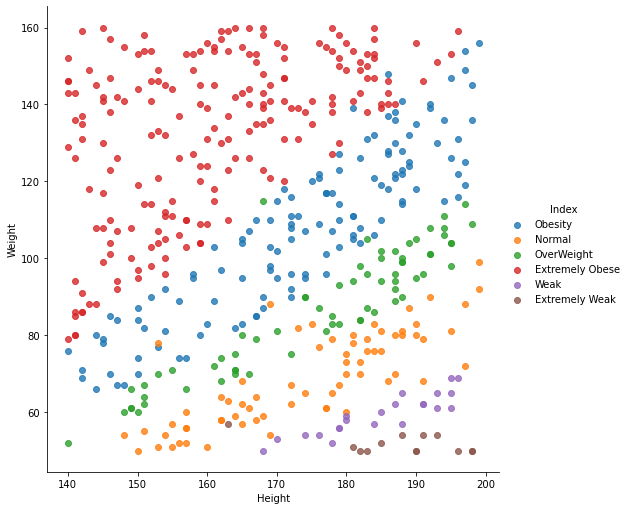

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
print(data.describe())

def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'
    
data['Index'] = data['Index'].apply(give_names_to_indices)
sns.lmplot('Height','Weight',data,hue='Index',size=7,aspect=1,fit_reg=False)
people = data['Gender'].value_counts()
categories = data['Index'].value_counts()

# STATS FOR MEN
data[data['Gender']=='Male']['Index'].value_counts()

# STATS FOR WOMEN
data[data['Gender']=='Female']['Index'].value_counts()

data2 = pd.get_dummies(data['Gender'])
data.drop('Gender',axis=1,inplace=True)
data = pd.concat([data,data2],axis=1)
y=data['Index']

data =data.drop(['Index'],axis=1)
scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_params_)

# weight category prediction
pred = grid_cv.predict(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Acuuracy is --> ',accuracy_score(y_test,pred)*100)
print('\n')

def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float(height),np.float(weight),1.0,0.0]])
    
    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0])
    
#Live predictor
your_details = ['Male',175,80]
print(lp(your_details))